In [1]:
# USAGE
# python classify.py --model fashion.model --labelbin mlb.pickle --image examples/example_01.jpg

# import the necessary packages
from keras.preprocessing.image import img_to_array
from keras.models import load_model
import numpy as np
import argparse
import imutils
import pickle
import cv2
import os
import matplotlib.pyplot as plt
import skimage.io as io
import pandas as pd
import json
from pandas import DataFrame as df
import math
%matplotlib inline

Using TensorFlow backend.


In [2]:
def print_image_label():
    I = io.imread(imagefile)
    plt.imshow(I); plt.axis('off'); plt.show()
    print("{}: {:.2f}%".format(mlb.classes_[0], proba[0] * 100),end='\t\t')#5부 0
    print("{}: {:.2f}%".format(mlb.classes_[18], proba[18] * 100),end='\t\t')#미니 18
    print("{}: {:.2f}%".format(mlb.classes_[8], proba[8] * 100),end='\t\t')#기하학 8
    print("{}: {:.2f}%".format(mlb.classes_[2], proba[2] * 100),end='\t\t')#A라인 1
    print("{}: {:.2f}%".format(mlb.classes_[7], proba[7] * 100),end='\t\t');print();#red 6
    print("{}: {:.2f}%".format(mlb.classes_[1], proba[1] * 100),end='\t\t')#7부
    print("{}: {:.2f}%".format(mlb.classes_[19], proba[19] * 100),end='\t\t')#미디 19
    print("{}: {:.2f}%".format(mlb.classes_[10], proba[10] * 100),end='\t\t')#도트 10
    print("{}: {:.2f}%".format(mlb.classes_[3], proba[3] * 100),end='\t\t')#H라인
    print("{}: {:.2f}%".format(mlb.classes_[6], proba[6] * 100),end='\t\t');print();#green 5
    print("{}: {:.2f}%".format(mlb.classes_[9], proba[9] * 100),end='\t\t')#긴팔
    print("{}: {:.2f}%".format(mlb.classes_[15], proba[15] * 100),end='\t\t')#롱
    print("{}: {:.2f}%".format(mlb.classes_[12], proba[12] * 100),end='\t\t')#레오파드:
    print("{}: {:.2f}%".format(mlb.classes_[11], proba[11] * 100),end='\t\t')#랩
    print("{}: {:.2f}%".format(mlb.classes_[5], proba[5] * 100),end='\t\t');print();#blue
    print("{}: {:.2f}%".format(mlb.classes_[20], proba[20] * 100),end='\t\t\t\t\t')#민소매
    print("{}: {:.2f}%".format(mlb.classes_[13], proba[13] * 100),end='\t\t')#레터링
    print("{}: {:.2f}%".format(mlb.classes_[16], proba[16] * 100),end='\t\t')#머메이드
    print("{}: {:.2f}%".format(mlb.classes_[4], proba[4] * 100),end='\t\t');print();#black
    print("{}: {:.2f}%".format(mlb.classes_[21], proba[21] * 100),end='\t\t\t\t\t')#반팔
    print("{}: {:.2f}%".format(mlb.classes_[14], proba[14] * 100),end='\t\t')#로고
    print("{}: {:.2f}%".format(mlb.classes_[22], proba[22] * 100),end='\t\t')#벌룬
    ;print();#기타
    print("{}: {:.2f}%".format(mlb.classes_[29], proba[29] * 100),end='\t\t')#캡소매
    print("\t\t\t{}: {:.2f}%".format(mlb.classes_[17], proba[17] * 100),end='\t\t')#무지
    print("{}: {:.2f}%".format(mlb.classes_[25], proba[25] * 100),end='\t\t');print();#언밸런스
    print("\t\t\t\t\t\t{}: {:.2f}%".format(mlb.classes_[23], proba[23] * 100),end='\t')#스트라이프
    print("{}: {:.2f}%".format(mlb.classes_[33], proba[33] * 100),end='\t\t');print();#플리츠주름
    print("\t\t\t\t\t\t{}: {:.2f}%".format(mlb.classes_[24], proba[24] * 100),end='\t\t')#아가일
    ;print();
    print("\t\t\t\t\t\t{}: {:.2f}%".format(mlb.classes_[26], proba[26] * 100),end='\t\t')#체크
    ;print();
    print("\t\t\t\t\t\t{}: {:.2f}%".format(mlb.classes_[27], proba[27] * 100),end='\t\t');print();#츄리닝
    print("\t\t\t\t\t\t{}: {:.2f}%".format(mlb.classes_[28], proba[28] * 100),end='\t\t');print();#캐릭터
    print("\t\t\t\t\t\t{}: {:.2f}%".format(mlb.classes_[31], proba[31] * 100),end='\t\t\t\t\t');print();#프린트
    print("\t\t\t\t\t\t{}: {:.2f}%".format(mlb.classes_[32], proba[32] * 100),end='\t\t\t\t\t');print();#플라워

In [3]:
#load model
modelfile='fashion4.model'
labelbinfile='mlb4.pickle'
# load the trained convolutional neural network and the multi-label
# binarizer
print("[INFO] loading network...")
model = load_model(modelfile)
mlb = pickle.loads(open(labelbinfile, "rb").read())

[INFO] loading network...


In [4]:
#이미지 가져오기
import urllib
url='https://pbs.twimg.com/media/DrVa1eyUcAA_3f1.jpg'
resource = urllib.request.urlopen(url)
output = open("file01.jpg","wb")
output.write(resource.read())
output.close()
imagefile='file01.jpg'

[INFO] classifying image...


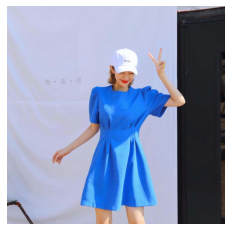

5부: 0.00%		미니: 0.01%		기하학: 0.00%		A라인: 76.91%		red: 0.00%		
7부: 24.46%		미디: 97.63%		도트: 0.01%		H라인: 12.51%		green: 0.00%		
긴팔: 48.44%		롱: 6.77%		레오파드: 0.00%		랩: 0.01%		blue: 100.00%		
민소매: 0.01%					레터링: 0.00%		머메이드: 0.01%		black: 0.00%		
반팔: 1.75%					로고: 0.00%		벌룬: 0.00%		
캡소매: 0.09%					무지: 91.46%		언밸런스: 11.99%		
						스트라이프: 0.00%	플리츠주름: 0.02%		
						아가일: 0.00%		
						체크: 0.68%		
						츄리닝: 0.00%		
						캐릭터: 0.10%		
						프린트: 0.01%					
						플라워: 0.00%					


In [5]:
# load the image
image = cv2.imread(imagefile)
output = imutils.resize(image, width=400)
# pre-process the image for classification
image = cv2.resize(image, (96, 96))
image = image.astype("float") / 255.0
image = img_to_array(image)
image = np.expand_dims(image, axis=0)
# classify the input image then find the indexes of the two class
# labels with the *largest* probability
print("[INFO] classifying image...")
proba = model.predict(image)[0]
idxs = np.argsort(proba)[::-1][:14]
print_image_label()

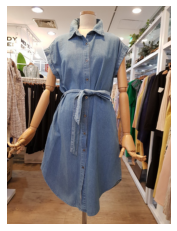

https://cr2.shopping.naver.com/adcr.nhn?x=4EhQ77eASXh91ebwgv%2Bxpf%2F%2F%2Fw%3D%3DsWy57biF11taidUndkbFE42R1Qj2bUsrvABHPK%2FNCkazlx9u9xsgYD10SmHYXYbnrlEZ%2F2ga14zSTlsAuRsCi5WVyf4fEeIwpi1WJR%2F5%2FpReVK5hNxRUBW3Fkia%2BRgsFT7OPo4DyntWaoMGYkgeJutwNB9UNb%2B8QgE1MZbURmqLy1YuDfWNjzWL3R6G2tcHt2UaGimURpLp1cstwbh%2FL6ye56vr9h9VoFduCJdN2ys%2BL8sDxCrG1R0O6gc7aEEhECUfW6GiBGC12mCNARMt9tKQ7TOu%2BiZGPPbCns0fxzoFb4FjQLKtgpdaxOC6%2FeJ5KosPFNkchYwWiua4avTMsWH6fCLd0EJlKtx3WA4Dq2fB%2BxaT5bt4sxgRB5eE3ICi68JLPeE4FGLVmT30qb5TmMdUD%2BhhiJy%2BeDJvd2vJjkI8YsooMXSPX6V7RBlBhAO%2FHP%2FxXtlbaorFjtq50raTOKCdMgwKVFaxkkk1B9Bjx%2FbwsOJa1ZldNM0%2Fs4ILMr6h6KcH9fRnfw7LDfT8NPQ0L8UMifaYG%2BC29Y3Y%2FhQNYzy2sNaIihL31n8fzswLphFshzcZpJOKxfsgVgCU6S1xFeDau0%2BF46jgnQNzJd9kSzMwaPaNBBrwJ9E5ziU1Fsi%2Bc2cMuN%2Bm6PeLCX2oTyolTH%2B6iV4ZKvQYuaeytIcm7wPVFU2%2FIpDqmmndR1urwmTi5MtJwT7b45ivgwmfpefl%2FCsWTjC0q0sVGPB5hnrd8hxGE%3D&nv_mid=82418636281&cat_id=50000807


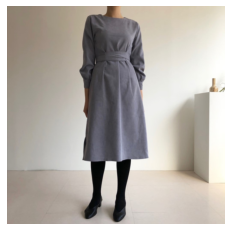

https://cr2.shopping.naver.com/adcr.nhn?x=VTswG9x7XMSxkza7dHFEUP%2F%2F%2Fw%3D%3DszusapuPA1swPXGjVpsk%2FCqKWgbKR0CcGOLeJUnsO5VrjCLULNv0eoQBGhZBe7rQhc5W2DLhH4FjGTSQ9n9S6YGVyf4fEeIwpi1WJR%2F5%2FpReVK5hNxRUBW3Fkia%2BRgsFT1gKfcC1Xiy8hWvwWrKp5iWXtKTCatwGZwO2tP3WfykoO1AQmHHZLQ%2B1N6pIK5ol6UaGimURpLp1cstwbh%2FL6ye56vr9h9VoFduCJdN2ys%2BKZ940MugpUh%2Fy03%2F08OlGd22EMFbZwoPT5oZA4sVftSA7TOu%2BiZGPPbCns0fxzoFb4FjQLKtgpdaxOC6%2FeJ5KosPFNkchYwWiua4avTMsWH6fCLd0EJlKtx3WA4Dq2fB9NMdO2rHS7FBxFAvPv6CfpiNR5c7JxdTa0y5YakrMcB44FIdX0RH9maAYxxSnIi%2FG5Icwv0gIY9%2BCZZdvOSlL7loN48p852Rugj0PKugIZ8NSEwQDU9WDL2U5hBcI1bMfHj9IojKrNhW6qa7YhFtP4f4iNb0Ohvssg66TL7J22T08RpVcvqNhW8cliRTmpghMNpKhlfUJ57LiGbSPRLST2DLgZ4WjDnDKlHWEMY3LEohuUgHhw92eWiKyab38qSZAh4SqB9xsxCSOoyG0kLJQhMUX2zb99p0SIJmWZgAoDfl5BdAZe1Y%2F1wIljyXB%2BUN%2Fm4JOhJzIV41c%2FQZzqmnpOnsqbBFwvwD715oPJB1yfvKK0OMA7mlH4i2zJOLzypGN%2FTcvpu3V%2B6raiVolWPmspl6TlF0GVUDfigldVoQsazA%3D%3D&nv_mid=81351811563&cat_id=50000807


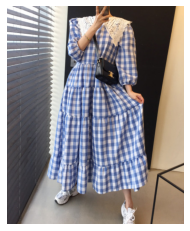

https://cr2.shopping.naver.com/adcr.nhn?x=UT3WnstIEjZarJU8tcrsaf%2F%2F%2Fw%3D%3DsktFs09qGXOBSEzdbUabszVrCuKlT7e0rUJh%2FdbsvvOGILhy%2BRFG%2BxsrHdY4i47wWiwb5yZXaQ%2BymoCHnTCeGUmVyf4fEeIwpi1WJR%2F5%2FpReVK5hNxRUBW3Fkia%2BRgsFTCrE%2B4zGm4I9ykMVqoU9OaTjxjVgIGwewb%2Bh3VeNUYbJe0QFQmQ0KUOmY511hkWKUUaGimURpLp1cstwbh%2FL6ye56vr9h9VoFduCJdN2ys%2BL8sDxCrG1R0O6gc7aEEhECY7HUBFraTw7dSxwWnlppCw7TOu%2BiZGPPbCns0fxzoFb4FjQLKtgpdaxOC6%2FeJ5KosPFNkchYwWiua4avTMsWH6fCLd0EJlKtx3WA4Dq2fB9ifKNLGQ1JClSFA5RRv5Ex6KIEDwV3MvOWDPmo1rSWf44FIdX0RH9maAYxxSnIi%2FEZ2wpgkB6GjAHRAKHDuWp%2F17D6TEoSihEH7c1IzdanZoDPUXy2n78XrdqlL385kNHO3aHbRjFtYpszd8hi71wwSjsSlJjY%2FZ3TMlxcuXLSSdT8yKORb1QW1LOkjlmF%2FaSA7eqJ4fn7Z0LybynwjUn%2FQkq4BxgNlPjuLmogIAHtcH5raLsIvSjn%2FaoW1n%2FZg4hh6tfDTIc%2Bx6vgHgUFKgd%2Flbgzx8jzdqmu4J0VOWw%2BQODSYT6HeV0HtkLFh3BHUWbAyuQiWjapCDvcO4UZWecpAhASbwPrudrhRq7A4wOvr54DeSjjSpvxBf%2BqyHj5JNVbXL8RAGNQrmc2lYJxnnPWU%2FBVkfKJOE9wu0XsqPIfRmVmbKDr5K%2FxNVLZfoxknzI%3D&nv_mid=82390092347&cat_id=50000807


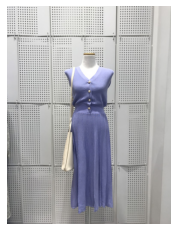

https://cr2.shopping.naver.com/adcr.nhn?x=X%2BOKcx1il8EdI%2B2PxrJHtf%2F%2F%2Fw%3D%3DsJ0y1%2FGhExUENXRc3nPTNJs95rMUdkBKxzxxlR%2BBB0Kth5KqR3tbnGLAZBIc9wE9MisIReFJTNYpHcM6GKZP8R2Vyf4fEeIwpi1WJR%2F5%2FpReVK5hNxRUBW3Fkia%2BRgsFTSdQELEbqDFPCj1fv2pthEdLWRvOQwa%2BUMTDtNv3XqzPfHArtqS8ce5OSZBIHoaF6UaGimURpLp1cstwbh%2FL6ye56vr9h9VoFduCJdN2ys%2BL8sDxCrG1R0O6gc7aEEhEC7G4iYgvMfoWTJzX%2FJEGFXg7TOu%2BiZGPPbCns0fxzoFb4FjQLKtgpdaxOC6%2FeJ5KosPFNkchYwWiua4avTMsWH6fCLd0EJlKtx3WA4Dq2fB8fNlmi1HSAtgzOBOIGw3zi%2B0pEscu23C0EE3DtVsNauo4FIdX0RH9maAYxxSnIi%2FF%2BuUulAjbaWB8Icf2Wnau6XlPFMTUrsWp5RPYcu8X6HqxjKhkJ4RllxObkuD8klLz7oiuTjvR3dZPSn1yRSnBtCVpm1ei38JeqpRACcw7d8797EJGVhaThTs2d7Q6zYUzCO%2F04ZQxMGOq5UbTkAL6B2%2Fh14qheDcebK7ajpLfY8kL0wnybi5lBTsvxTQXJjFNnaxlqyamwSTHtAzKmlFzQ4Xz0xj8eB6CZ5MjYkDTpKTT7tnio5dkYnILE4bJOXa07rrD2yV0OqjcXoqnPdRVlxRRKcicOom%2FhzOkzDnAue3I2y9WGCyW72rB1GcYI28eeXYhKK3Lzg7RBn1aCsjaWP6OUWVLDKvQxST41b4kjgzdfkkdHEHXuR1JJ5LW4I6c%3D&nv_mid=82442928405&cat_id=50000807


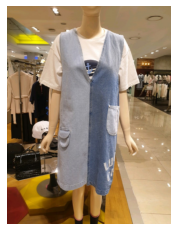

https://cr2.shopping.naver.com/adcr.nhn?x=18hN4aSpXRHkQfGsuT33Yv%2F%2F%2Fw%3D%3DsRqy2SBVwIXoxc1q5jQc997XoEnCyN%2FXQzamzcAe3rMbFfAXsUqFCMpqth9619462K6HgozGzrEv1idPK%2B0jdNGM5ywTNbvkDUq403b3HrmP3mrP9L3bKHJ%2FdpwvsNiiCGkvP8O7qSO3p9z9z6%2F7t61r6D7MPoNIcaUW%2FZ4M1V%2BFSnS31FYUC5xhZCoMQCpQEc%2Bz03%2Fk6E3umo8kRsQ%2BuklcMXxsZ5YxnXDTf1Kyc58MvcwaJyugslJObIohizNgCi9Tgido7r3KUyMY8Nkwh1VJvJaswEAHzh4%2BeL8l2tv4xYwKYCF2wSheYXztta1k90KwhYrfAVEmMb%2FMhECMzRrr9GyESxlku1GP2cO77NQ%2BSOxqpHIivfuNeJj4H%2BJivtd%2BVZaS3SC9SpnQogkLUfMfaDjCW6HUREq33zSyI9skqwvZYni%2B6zAz%2Bk0wW0bx3f%2BX1axMxyNt%2BoSgWZ3yo87WIW6mMErTNgRZqK6OSLxeobHIavWvxv8AMI6527L2Lm5tXExT%2By00vCrYNWX45G%2FpCfOfcUVf7UmLb%2BA5EAiEWHSsZvj2FX08yAcwe%2BNBw0JqNxahwq%2BArcxy%2BxIMYlU1vQ7OaIYMOAT38lWJXfwAmPt3gT3wmsWhsFXxXrlXvXV0E9%2F0DzBDgKkXVDF8Z3qzK9%2Boj2BEsl5yRSwFWW9A8jVdElYCJezDxLnpY1ZIwYkgSxCapMRExjZfMganty5qsp%2BKcAEKiW6UomiUYnrNlZmyg6%2BSv8TVS2X6MZJ8y&nv_mid=82387680983&cat_id=50000807


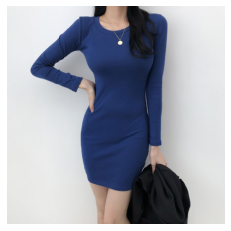

https://cr2.shopping.naver.com/adcr.nhn?x=b5RbNXfKpuG6mv7NBaKyjP%2F%2F%2Fw%3D%3Dsvl6SihIpb23%2BHCYpkH5n2xvGxGznGzS7whIAf8CjKVXDa6H1%2Biguo5h55jpGYKv%2BMySgtFDS%2FO%2B%2FoO1XtjfbuGVyf4fEeIwpi1WJR%2F5%2FpReVK5hNxRUBW3Fkia%2BRgsFTDvaF5t%2Bl%2BP3W2oiOaHe9v1nSoeGKuA8m1d7L9k2AFhg7R6ws%2Fvwo6L3WBrQ%2FQaNTUaGimURpLp1cstwbh%2FL6ye56vr9h9VoFduCJdN2ys%2BL8sDxCrG1R0O6gc7aEEhECO4B3bRe%2B8zJ%2Fl8TIKsjPIw7TOu%2BiZGPPbCns0fxzoFb4FjQLKtgpdaxOC6%2FeJ5KosPFNkchYwWiua4avTMsWH6fCLd0EJlKtx3WA4Dq2fB%2FA33rTf%2FU7c%2FMgaLXpr9FG8rjWunbc%2FttrtW0KGB%2BFTI4FIdX0RH9maAYxxSnIi%2FGMEZm6lfWFNC56DL7jUPmv96PtJ8g1zV3tlgKQSLJOmKGDNnfh%2BUcWLn0VMpD5e5nHj9IojKrNhW6qa7YhFtP4OV%2BdorJLyzER1%2F7EwihR9bQrMahNNP9ZxQJP2at7tIyPLZWWbh4hdgN7Ccw7Qsq2WpIdbkGRpGi5wYmJa9KNLEJKuAcYDZT47i5qICAB7XAriBY6qwrNMhENzFwZ3Wx%2B%2BKnQQXY0AMxFRaQ3If5%2BQm4iwi1lRwK2TVjSiLsrvezApnSAy2u%2B248SueU2Chvijd4navWN1uyTcVWs%2BJ25cYObuYudGbA2AWN03CC%2BX%2FHOgsPoNMZwYw8bUkL03hY9FWdgsdfEgzw0NkA7I%2BFRifqDO%2FAyIwU3POfFJCMsYAI%3D&nv_mid=82385465086&cat_id=5000

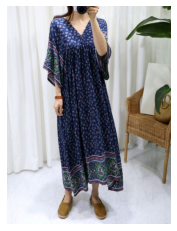

https://cr2.shopping.naver.com/adcr.nhn?x=%2BWDMbMpO%2FPj8%2FM0f662r3P%2F%2F%2Fw%3D%3DsMgpWh3oyUdrjGhMqppGtIRfLbpurfwyk8oaYorVBH3NztdgajpzwQZxBR7w4pcanVXL8KXjS6wVQP8Z23Z5Ekal6LyjznO%2FsH0Pfuqo3X76p4IBYqxUkkcWo13LGeTJN4O%2FQbzb%2BX6TyvmbpYGYSgEPWuvyjmKy7yoRwcNopz3i5KqeXdegBxCxnW0PHcyURQVsF1lfo%2By7timqqpUEAmH1wFkbO30K4iH8DIsVS%2F5IqUOY4GKYy22Pvlriy3rEEB%2FB8xVPsn0lNrXB9YTtVa7norlAFBEuxAUIhghMF0kClopbpieagPRoipJ%2FEZ19DagiK5o1NShQDksdLRQC9awVOsrG0SlPHzAh5vONfPLAwO%2FpAQayVCo6Vl2HjBVscshyXFr0mM9hkhC%2Fodvjy1kD%2BhhiJy%2BeDJvd2vJjkI8Z8qpsgL51EceF2XJhgTLQZbQBjk3hyPJGFP1uWmOEZuUeCWKWiep3lR2tyU6GpGJtQvUCiAyjId%2FbRBcnbu%2FeGjddbgoCcz8fS687B38hP9PlRUntW%2BXm%2BQMmVtzL9lc0WHSsZvj2FX08yAcwe%2BNBwzvcQHL5UzPYQdNN%2BOVBVZhQYWdFwoYUtEZ4tpWKi3q4kknYS%2FKJS4gsHO35poRGKn4jNScezQbbqmMmNFVNrJmb58SXcdeYZEbYxcr7cbYhoNd6iVv28f9suAFaT3y9gzoLD6DTGcGMPG1JC9N4WPbTuLB6HOpiZc5yT3BYD%2FloSjLQAVP%2B1RHgseSSdPYNON1%2BSR0cQde5HUknktbgjpw%3D%3D&nv_mid=82011944382&cat_id=50000807


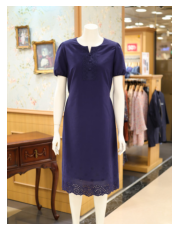

https://cr2.shopping.naver.com/adcr.nhn?x=2gfHJSenTR5r8EIkiQeclP%2F%2F%2Fw%3D%3DsdSQv7Lg%2B9MxBcHh3B1n9bVDfMlp7u2IFYADBf%2BhskZohzU25NGpzgFnyz6S8SDiwRQz0ug8JJdkg6wBwiqm%2FfWM5ywTNbvkDUq403b3HrmP3mrP9L3bKHJ%2FdpwvsNiiC8XaDPYeudpvlhzdKuYHnh01K8C%2BxxJ7l0F2LhKPyrG1klUmZYrL%2BdaXnijyBakwnc%2Bz03%2Fk6E3umo8kRsQ%2BuklcMXxsZ5YxnXDTf1Kyc58MYrRxdKVpwsu15bsVFopgu5q%2B9HyMoYBkpXDPAvHdwj1JvJaswEAHzh4%2BeL8l2tv4xYwKYCF2wSheYXztta1k90KwhYrfAVEmMb%2FMhECMzRrr9GyESxlku1GP2cO77NQ99E5R129NUboCP9TRnljpnsRB9V3iAIMUMcQKiD%2BxylvGhB8Ps6FHHxGqpxVzRGw1FotEi9YXluuNyVbqrGpIFNlc0CbJMIcyQiQ%2FSwPbLKEUwFCBlqOAGg6P%2FggPmBssR1tYIPHI4U2cPFj8vLRk1RKlk%2BGedQQ2E2x14qh4Es2AZehi%2B1afVNuSOlqWDaCF%2BMTm9A07wDjlNrg47HozJRkvWSxF%2BhvraEbdRsW1gWwJy234AZSSi%2B0coK2KwJH%2Bhltkr8uzYyVkdyQ3uOw5988hzV5x1dj8ZNs8gjM69HtqOYO2ysxsirq%2BO9iXWov0JKOAqcCFkF%2BGS4WQirX1PoH6Kwlq1HQ9f3i%2F%2FJUpdd3%2FmCBxWROojwLnx9jYMT5xlZmyg6%2BSv8TVS2X6MZJ8y&nv_mid=82011290862&cat_id=50000807


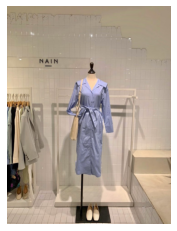

https://cr2.shopping.naver.com/adcr.nhn?x=tUQ3xWyGGrHBUDEpOSXXYP%2F%2F%2Fw%3D%3DslSQ%2F84HgW%2FZTUuWh%2BvDyJheH1t6gmbEG61aOMoXVcXFuFCuG5g0txAOIWjWJC%2F09i824JmbOp8encRxF4tYEVIYlFAdf1OFsetsPTCIBnAtPOdYsvqvAV2kweJQXbUmGZcmPf36%2B%2FbuOJ6p9jNXf8B4ijRUasAKfV2y3jbU%2Fko6LBUwrQD28Dtw2ih%2B5UjmImjoIjx30OIlJm44LKcmfv59%2Bw5fyb2S%2B0WKUIuNO0Akl8HAYn6NkzRDrGPGQ2ZUxjXc3ERe5%2FbOtwIMR36QrCEaAb%2FOdjaJ2XbA%2BJKlL%2B499LsW4RgipVPKA%2F2IN4cAJ4mmic2vQ8l3OPvPdLBTB5%2B6UB08G4lR0a9fquA%2FPNrIdfb8XAEmQxKXyRn%2Fc1sKH8a8DswHyLR8iRrLOohQ0No4FIdX0RH9maAYxxSnIi%2FFrUKNUqBKv%2BnErRd31katWf2FwBXbEf9uKBRVwezcK3tRINGctjvGdVtnJoXlrkXRi4ew31iw2Zd5GR%2BnATZ%2FqCFb80h%2BwuBbdRZ1CdiRNinx2BOFyAgllbtF5VHMUuIR3bEikTBLvCFTI0iCoNObO1h3LCBm7mFiSST0XYYYqkRm9EIyosQR97qLvjELWxX8eqfDdfU5Sp3VdxgGNkm4PcmlXfVxm22LKCQDEDsuT1p%2B6gH0cJ8leozzhDR6S4fy13CNfQD0KsS4CYvJdzfPJCpA8AbRPJk21C%2FIUtNxVIe20rkhlf7ndcSnnWiSVdR0xbZ9WhyNt%2BhoweCOaxtfSN1%2BSR0cQde5HUknktbgjpw%3D%3D&nv_mid=82366013215&cat_id=50000807


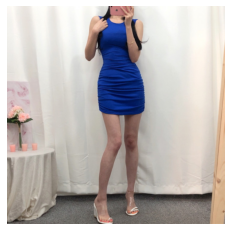

https://cr2.shopping.naver.com/adcr.nhn?x=KJCYJAPg2FATqnIqYZBBpf%2F%2F%2Fw%3D%3Ds66S21xsLahYBu%2BuIRL%2FTJWzAZD6bc2KwOzXoqf7kTnRdD7sbAF6HTqc3SXLA3onMcGKCHtKGixFIYhqc8c5CBYYlFAdf1OFsetsPTCIBnAtPOdYsvqvAV2kweJQXbUmGufrPmRVnpkpcjvTcA0Zgsy624gohynrGvWXbVN6KyD%2BWGHULC4SO8kpzAFsSCFTtDTj4NrXzs78E5ZjhTpQl359%2Bw5fyb2S%2B0WKUIuNO0Akl8HAYn6NkzRDrGPGQ2ZUxqZhkmrjJTT3PLsl9afQqJEaAb%2FOdjaJ2XbA%2BJKlL%2B499LsW4RgipVPKA%2F2IN4cAJ4mmic2vQ8l3OPvPdLBTB5%2B6UB08G4lR0a9fquA%2FPNrKYzIxD26T1A9ocOR%2Fson%2BU4FnNsael5NTL0KEw7e74ZI4FIdX0RH9maAYxxSnIi%2FG7KNPJmBiCpTtrNvaWZqnPCexQafJLqfLBlijHB2skA37SmYKBW7qz96op87UTz5v7IHD0hySZ0H1cG9oz9tquGspja5mNUm1bm4lQzezKxb0OoyZRrru0pDrumx1e4vObTx%2BXKTRXRPS9BqZ3yUIU3au0UFYbEWKpiyCjk%2FtWBo4SiysHEMXL62kWHdmLnii%2FV3%2FkhIroNjSVCqPzSdymxpLHxL31ecSloXbrsTjqvQ4gIjuEZhnp6i9H4wvaBU8dLKGOl%2FMQcYV5ulR8OtNTw4fh0SA%2Bb%2FJAwipzEYhBkSKaB1ZTL3Bn17XIDAW%2BUuOyfOZtCE1BesXLYnZCu0jm4XL5cdFg1SMUXcIBcywc3A%3D%3D&nv_mid=82427609427&cat_id=50000807


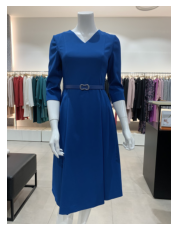

https://cr2.shopping.naver.com/adcr.nhn?x=p1Jlq3q%2FGv6VOkNw9iuqL%2F%2F%2F%2Fw%3D%3Dsjt3sYgKvxHlGEQFoZpw%2B%2FhGdOY9rSKaU5JPsHALIz3D3Up4%2BPLRBxa48KIA%2ByavfeDlFIx4DfYZR5O1jIh1GPtqUHsgHKRqzd6nX3jcvUwOdH42U7aNy%2BGYWPOIcmanYQ66qwvlpD%2FTSmHkHNqlXC7SLLIOh2Vd%2Bsn%2FBJ2DhJeNJE3ih83eWQLZXuQN2yus6obm40a3AfVHNV15D72g8jm26YI%2FkcEfVeLDnwysTo3PNy707L%2BRWF35TfL%2BA9SSqVjMamO6SHJRu9RVdDNd3YNWN%2FchhV1d04LIGrXJUbzg427ngu9Ku5Ti5fmyIKbcNfm5IA8mkaCGulhqR4WtRHpI0ATT7UDqLFrBc8%2BGsW46h4UVTzCFrSPvVbbA9bi5%2Forkxiz4%2B%2FHq3obTKP1XqNpt43sYhUys88YQO8o3Yx6Rf6MEzSd25rps1D%2F6UayPHZhTfNAiFcXA7USA6dZk0mWjSIZskVq8jM0uUamH%2BXpoDTcKCgSCSjG8XMmYJPSnAV9LHwh71NrVqR6pTGDCCDhT%2BoOXqedp4Hrs6l8Ll8xN%2BMTm9A07wDjlNrg47HozJ5547QbutFpIoxNlKBpJU2x6p8N19TlKndV3GAY2Sbg%2B%2Bmfz8bux1qYI8%2B0WeqcZxKcxTTC9YX6hiZu0UIHOHfLYOFJXlfBkW9qx68L2s4LWygkjzw53KMVvZqWonznHwzoLD6DTGcGMPG1JC9N4WPQ8WU5qODDyEyAIr2dJe18qLvnqi5GAPbEgHqILbZZx3N1%2BSR0cQde5HUknktbgjpw%3D%3D&nv_mid=82414545126&cat_id=50000807


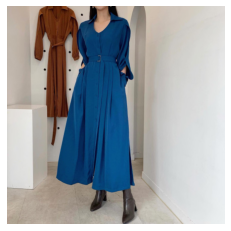

https://cr2.shopping.naver.com/adcr.nhn?x=tmDAs3eY82p%2BecU5EZYRgv%2F%2F%2Fw%3D%3DsrIzwPCbT%2BW9aGWobvGGaXRz8sdeJ5BMjERtjCOZDlmOO%2BTxkyIXX5NzH23QDrfETF86eZ3KcOFSAtzOJdKnXgmM5ywTNbvkDUq403b3HrmP3mrP9L3bKHJ%2FdpwvsNiiChbUUMnxByIQZAhs20hSCLFkC90eCq4vrRQ42I1os0hnUk0e0IeypXsVTyAKuzLWoc%2Bz03%2Fk6E3umo8kRsQ%2BuklcMXxsZ5YxnXDTf1Kyc58NMMY1stIZS43GUJ5Lnn63%2BKOr79M1k2x8a5Go%2BnJtM01JvJaswEAHzh4%2BeL8l2tv4xYwKYCF2wSheYXztta1k90KwhYrfAVEmMb%2FMhECMzRrr9GyESxlku1GP2cO77NQ9MjxKqg%2FqruKMQSfcg81%2BvcTW7vyZ6s93ZTV3AvsRM10D%2BhhiJy%2BeDJvd2vJjkI8aNa2QDPd%2BjWFLFEkFC%2FgbfFjUxu3%2FHQRadBoDUJTr%2BgfTFDxR3ZPSEEc2XD1fsGwRz%2F9z6J9bfSjLNWLweNZ2tZXYp3pRkoJQgAhg%2BfmzaWxEoqZamyMmcWl6ivGfBwVveD86GQ%2FgSRNz5IfRV7f0W2qyL0viSHSUQdeYJVZpAgPre0vPhRX3G279A06GdERR7ELZI%2FGD3sYVscFF1FkyeG2YGkUp6hgubgIvWAEUaFEN%2F2E90oi2%2FM%2FjoLxxw7kTiq6j5Gm4Og7YX8mgivKTdOo0jdEKElR4cjvelg%2BJQyzcvGeQDNWOjun8o%2BQOtVHS5T3m%2BzYg9%2BdH3xUTk8Xko&nv_mid=82294203397&cat_id=50000807


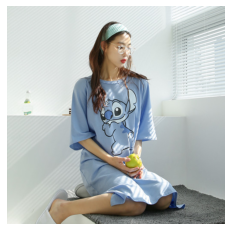

https://cr2.shopping.naver.com/adcr.nhn?x=HUHHdnxGeTXzwJk43C3D2%2F%2F%2F%2Fw%3D%3DsY%2BCaskx%2F6RIbDm6lbwA3sGb5Asf2Q2GEQvXg2UiHfdxe9Zl4Y1rIhiLtihAcWwUZQTF%2B6cwTL%2FPGtoRKTHwjUKl6LyjznO%2FsH0Pfuqo3X76p4IBYqxUkkcWo13LGeTJN4O%2FQbzb%2BX6TyvmbpYGYSgO03q%2BiKrl%2BC6qkZJ6BZopwrIES2XoXwzAkir7k1j4SIti6ztfLHm8ujmAOJrM9DnH1wFkbO30K4iH8DIsVS%2F5IqUOY4GKYy22Pvlriy3rEEe0Ny9hTmKrDXAe%2BAkHhKMrnorlAFBEuxAUIhghMF0kClopbpieagPRoipJ%2FEZ19DagiK5o1NShQDksdLRQC9awVOsrG0SlPHzAh5vONfPLBauNzyC76l%2BXtcGUjRZDzph1BtSCFbDrR%2BjFXiPsop30D%2BhhiJy%2BeDJvd2vJjkI8beqAHl3Ft8taWdYL%2BjFr6y9pvJJW4B6kPgitsjmfbbQGYZUhX6SizVaqFG%2F5UdbsHxNlkW19bDf%2F%2FdSIvxHe8T%2BVFSe1b5eb5AyZW3Mv2VzRYdKxm%2BPYVfTzIBzB740HA%2FrLZdtUKWmpinK2EcpR3FFBhZ0XChhS0Rni2lYqLerj%2BIr9k%2BpDt73TTThMN7t7rj09gtT4scOIHa%2BS15Sbndre2tYtyPfD9Zfy8pgnSTTKZkw5YVyGGW6tSS6hS0Tk%2F2VW6akR15YH9iDUqJfBr8iU5ePVvhTVmCR1XLt3mFZwDu8df3SH1HSEYMu64c3zQ%3D&nv_mid=82404656992&cat_id=50000807


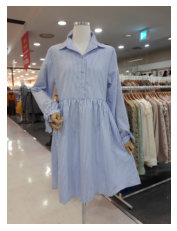

https://cr2.shopping.naver.com/adcr.nhn?x=%2FA%2BzWWvKOshuZEcjCTP8sv%2F%2F%2Fw%3D%3DsS9pYCuYZYVG%2BZ862G3MWA4UzFAGMvk2FTmuEhGqQWs06k2WJFYi5a7HeT%2B9NYn%2BFCyrMKOuP1pwEoXEHtQNOiYYlFAdf1OFsetsPTCIBnAtPOdYsvqvAV2kweJQXbUmGS9slije8gXMlkxXwqftMaxqWRObd2Yd7VRkE90HaBw33qIhKk7QukpeYtGoAN3YiU4HgpwwsDAwCj25xXmg%2FAp9%2Bw5fyb2S%2B0WKUIuNO0Akl8HAYn6NkzRDrGPGQ2ZUxrwVEDrrrFsMbjhobOA7ndUaAb%2FOdjaJ2XbA%2BJKlL%2B499LsW4RgipVPKA%2F2IN4cAJ4mmic2vQ8l3OPvPdLBTB5%2B6UB08G4lR0a9fquA%2FPNrL1bgT6rgq3YZHw3Fo0OdKXu3PLNhQo6IweR%2B%2F6izV0ahrv6tDzHWai9n4avpR9ePgv%2F68Q%2FRaemGfjXsjyQ7XvI0RD69odh%2FojkgpC3Dg46W5bMo%2FDYegeNt1GWCRxnQJhgJu2zOe00h2EUIGya%2Bt6EYtczPD%2FUVmXetFFoTsyhK1Gpe9UmtKEYWBh7dTtkO2kJ2Akw0%2BbBa3V7tdvtGH88YK26TFRi7wOM56FQ%2FdCbcA5DGo8mzSUrut9NjbSPDPdbRMVnCU3QuROmX3YcF9yDDepJ3P3O3uHGrbbVVxfXzXQa%2FN6oNsL1FDLiY0v4dJ7mJ1V%2BIlVvGiOyLNzG4ig1iD5Ja6Yb77aRMsxcEciUM4K%2BrmYHfu%2BVWj5gr%2BiiiXqV3CH%2FRu8sU8PaxHTQkTyu7KFmYCVxoxx5St%2FOU3FYF6fEVNgH4gL0mpuYrCMyro%3D&nv_mid=82389226567&cat_id=50000807


In [9]:
# DB이미지데이터
df1 = pd.DataFrame(proba)
df1 = df1.T
df1=df1.astype('float64')
df2 = pd.read_csv('result4.csv',index_col=0,header=None)
# 입력데이터를 DB이미지데이터와 합치기
df1.columns=df2.columns
merge_df = pd.merge(df1,df2, how='outer')
from sklearn.metrics.pairwise import cosine_similarity
log=0
for (black,blue,green,red) in zip(merge_df[5],merge_df[6],merge_df[7],merge_df[8]):
    max_color=max([black,blue,green,red])
    if max_color==black:
        black=black/2
    else:
        black=black+4
    if max_color==blue:
        blue=blue/2
    else:
        blue=blue+4
    if max_color==black:
        green=green/2
    else:
        green=green+4
    if max_color==black:
        red=red/2
    else:
        red=red+4
#     merge_df[5][log]=black
#     merge_df[6][log]=blue
#     merge_df[7][log]=green
#     merge_df[8][log]=red
#     log=log+1
    merge_df[5][log]=math.log(black*10**4)
    merge_df[6][log]=math.log(blue*10**2)
    merge_df[7][log]=math.log(green*10**2)
    merge_df[8][log]=math.log(red*10**2)
    log=log+1
cosine = pd.DataFrame(cosine_similarity(merge_df[0:20000]))
result=cosine[0].sort_values(ascending=False)
df3 = pd.read_csv('./final_200424_AllDB.csv',index_col=0)
df3.iloc[result.index[1:15]]
for (image, link) in zip(df3.iloc[result.index[1:15]]['imagefile'], df3.iloc[result.index[1:15]]['link']):
    I = io.imread('./0423_final_crawl/'+image)
    plt.imshow(I); plt.axis('off'); plt.show()    
    print(link)

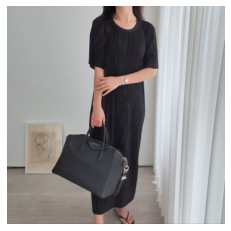

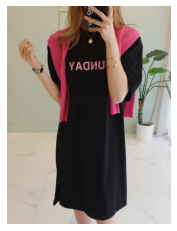

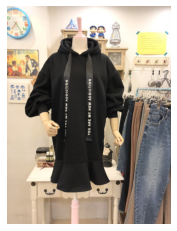

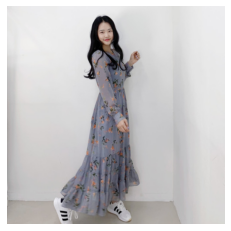

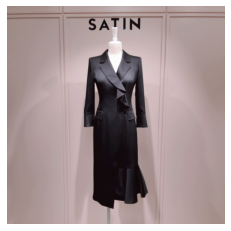

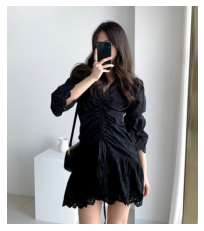

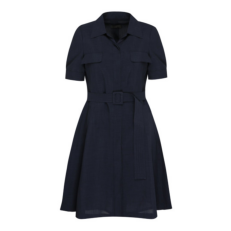

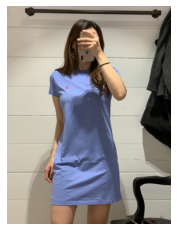

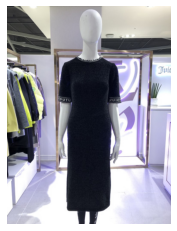

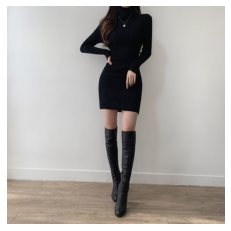

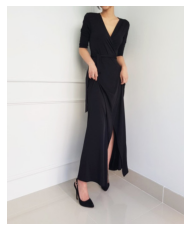

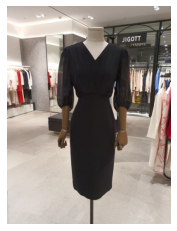

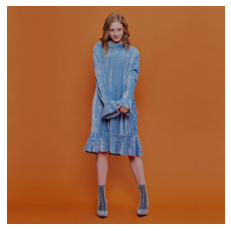

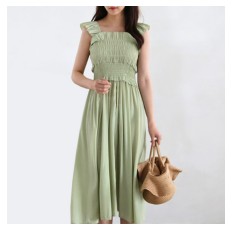

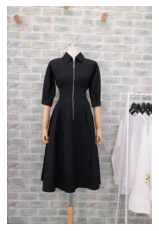

In [7]:
for link in df3.iloc[result.index[-15:]]['imagefile']:
    I = io.imread('./0423_final_crawl/'+link)
    plt.imshow(I); plt.axis('off'); plt.show()

In [8]:
mlb.classes_

array(['5부', '7부', 'A라인', 'H라인', 'black', 'blue', 'green', 'red', '기하학',
       '긴팔', '도트', '랩', '레오파드', '레터링', '로고', '롱', '머메이드', '무지', '미니',
       '미디', '민소매', '반팔', '벌룬', '스트라이프', '아가일', '언밸런스', '체크', '츄리닝',
       '캐릭터', '캡소매', '티어드', '프린트', '플라워', '플리츠주름'], dtype=object)